<a href="https://colab.research.google.com/github/jirayuwat12/SuperAI/blob/master/iot/ss3_hackathon_online_iots_and_roboticsV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Kaggle Library

In [ ]:
!pip install -q kaggle

#Mouth Google Drive

mouth your google drive account ***everytime when start VM***

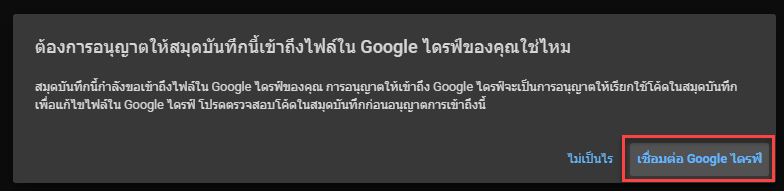

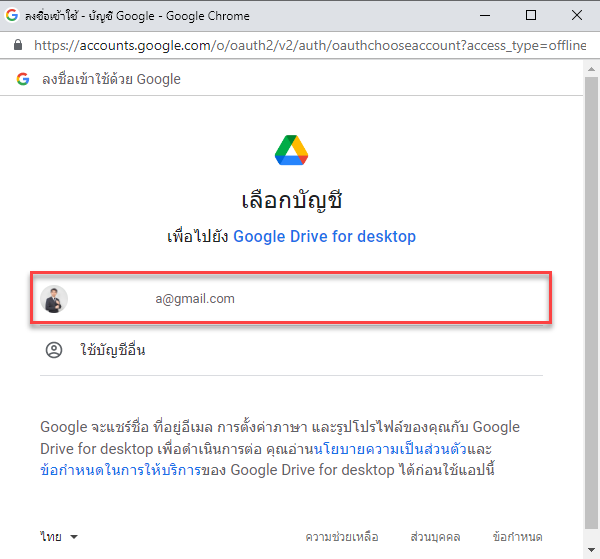

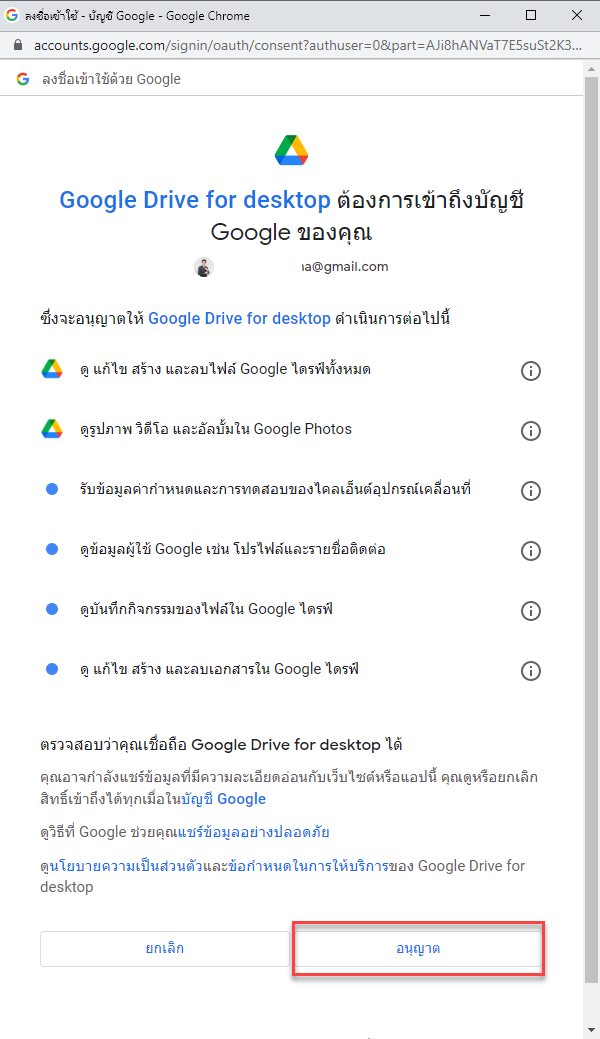

check your mount

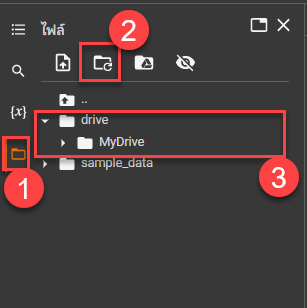

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Kaggle API

***Do only one-time at first***

1 go to https://www.kaggle.com/me/account

2 Click create New API token

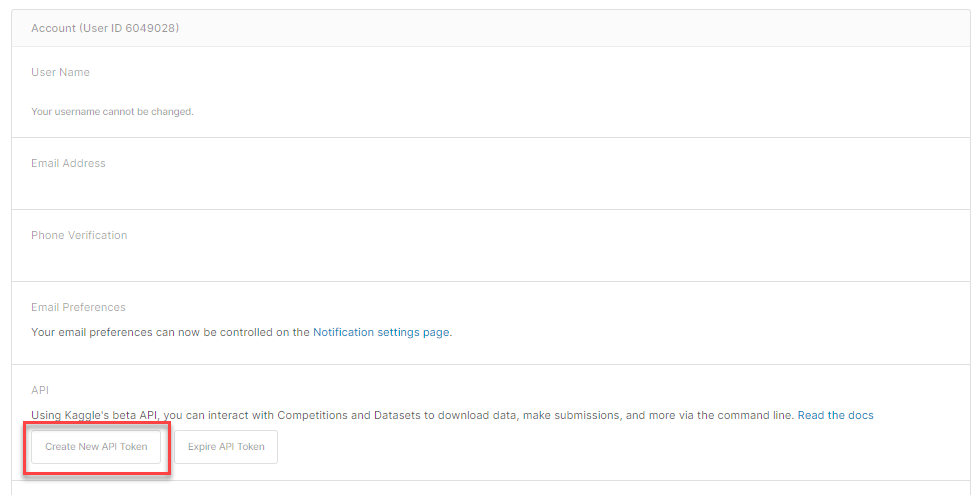


1 login to google drive and create some folder (try create "colab" folder like me)

2 copy kaagle.json which downloaded when create new API token to google drive

3 check file is existing in google drive
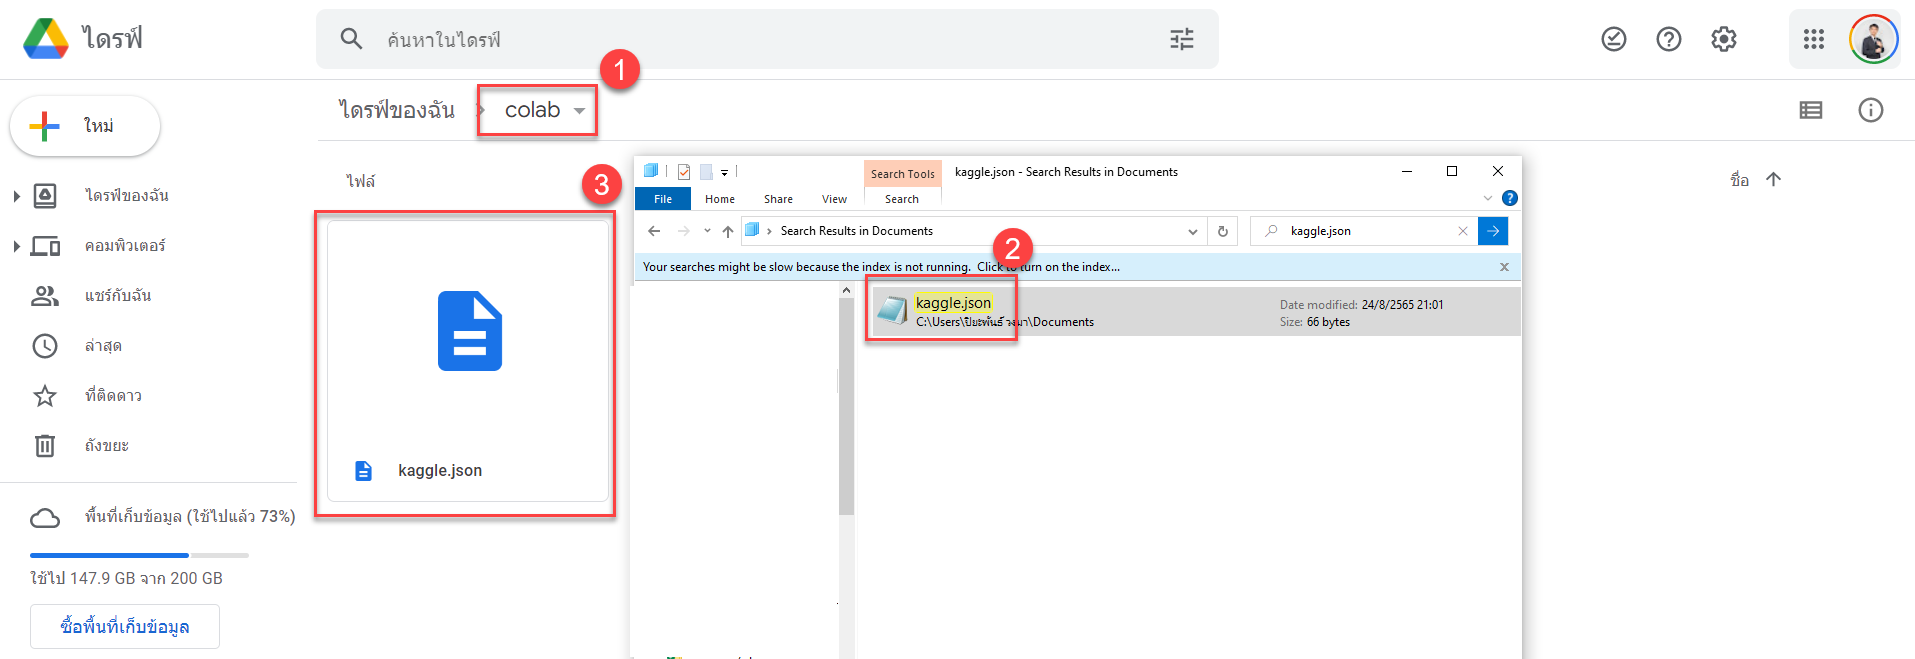

Source mount file is * /content/drive/MyDrive/colab/kaggle.json *

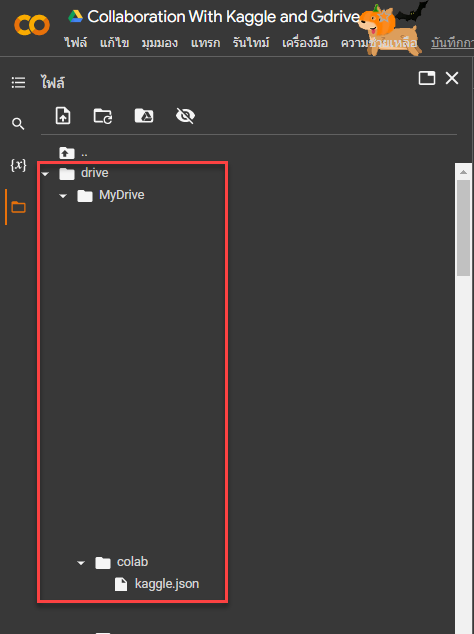

#Download Dataset from Kaggle

please join competition before runscript


https://www.kaggle.com/competitions/hackathon-online-2022-image-processing

In [ ]:
#@title enter name of competition to download dataset
competitive_name = "ss3-hackathon-online-iots-and-robotics" #@param {type:"string"}
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/colab_resources/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c {competitive_name} #download competition dataset


ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           9051        294  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           7176        230  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          12600        237  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

#Unzip file

In [ ]:
!unzip /content/ss3-hackathon-online-iots-and-robotics.zip

Archive:  /content/ss3-hackathon-online-iots-and-robotics.zip
  inflating: IOT_Submit.csv          
  inflating: IOT_Test.csv            
  inflating: IOT_Train.csv           


In [ ]:
!ls /content/drive/MyDrive/colab_resources/

IOT  kaggle.json


In [ ]:
!mkdir /content/drive/MyDrive/colab_resources/IOT

mkdir: cannot create directory ‘/content/drive/MyDrive/colab_resources/IOT’: File exists


In [ ]:
!cp /content/*.csv /content/drive/MyDrive/colab_resources/IOT

In [ ]:
!ls /content/drive/MyDrive/colab_resources/IOT

df_clean_v1.csv  IOT_Submit.csv  IOT_Train.csv
df_clean_v2.csv  IOT_Test.csv	 submission.csv


#Process data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/IOT_Train.csv')

In [ ]:
df_train.columns.to_numpy().reshape(-1,1)

array([['mac'],
       ['station_name'],
       ['tambon_code'],
       ['tambon_namt'],
       ['amphur_code'],
       ['amphur_namt'],
       ['province_code'],
       ['province_namt'],
       ['latitude'],
       ['longitude'],
       ['time'],
       ['humid'],
       ['light'],
       ['pm10'],
       ['pm2.5'],
       ['rainfall'],
       ['wind_direct'],
       ['wind_speed'],
       ['temp']], dtype=object)

In [ ]:
df_train.head(5)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2


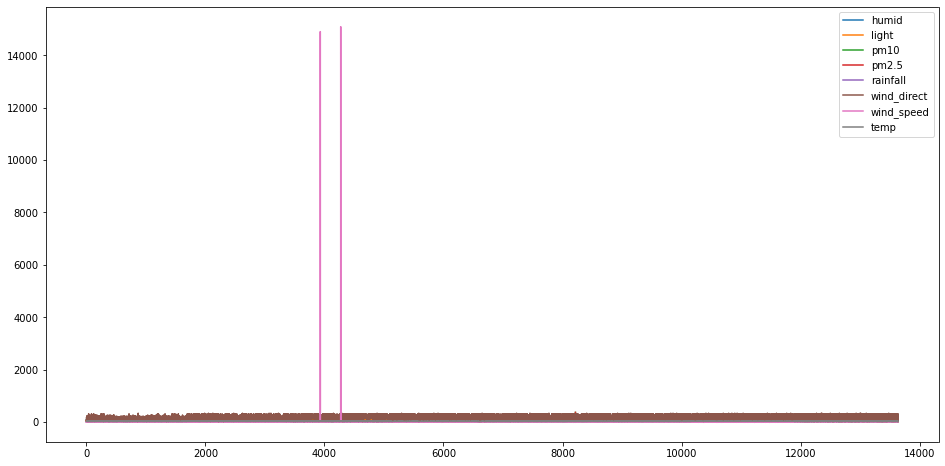

In [ ]:
df_train.iloc[:,10:].plot(figsize=(16,8))

In [ ]:
df_train_1 = df_train[df_train['wind_speed'] <=2000]

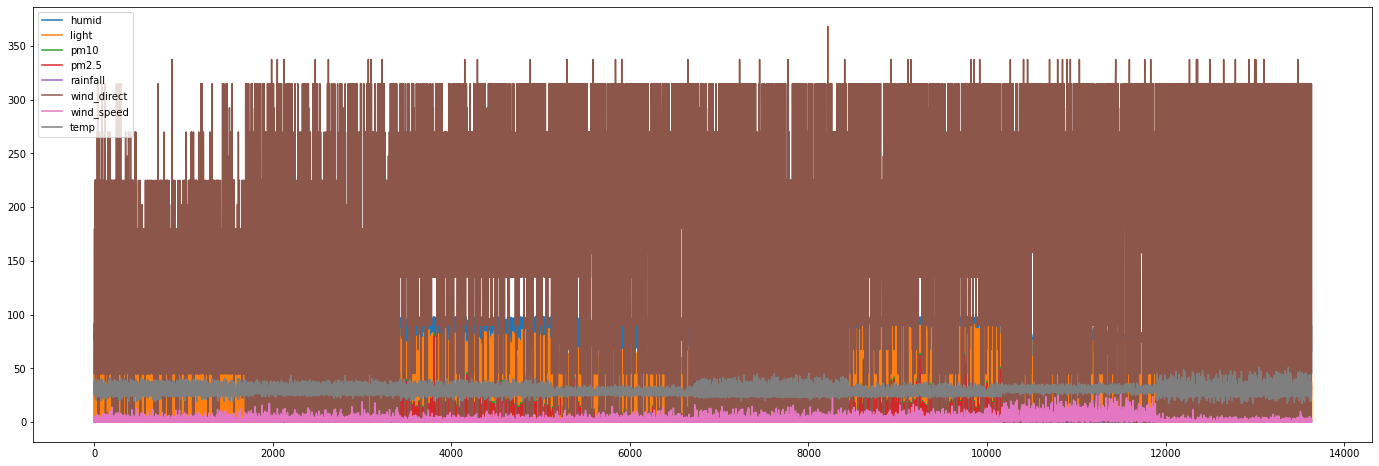

In [ ]:
df_train_1.iloc[:,10:].plot(figsize=(24,8))

## normalize data

In [ ]:
for i,column in enumerate(df_train_1.columns[11:-1]):
    print(i+11,column)

11 humid
12 light
13 pm10
14 pm2.5
15 rainfall
16 wind_direct
17 wind_speed


In [ ]:
df_train_nom = df_train_1.copy()
for column in df_train_1.columns[11:-1]:
    if column != 'wind_direct':
        df_train_nom[column] = (df_train_nom[column] - df_train_nom[column].mean()) / df_train_nom[column].std()

In [ ]:
df_train_nom.sample(10)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
7002,3C71BF17CDBC,โรงเรียนบ้านนา,550404,สถาน,5504,นาน้อย,55,น่าน,18.241106,100.690577,2022-05-20 16:00:00+07:00,0.536117,1.298222,-0.432752,-0.409690,1.136367,135.0,-0.011190,31.6
5254,3C71BF164F90,โรงเรียนท่าข้ามวิทยา,860206,ท่าข้าม,8602,ท่าแซะ,86,ชุมพร,10.579849,99.113146,2022-05-13 19:00:00+07:00,0.359320,-0.614254,0.869103,0.897319,-0.122115,225.0,-0.770183,28.3
9229,3C71BF1B1E28,โรงเรียนสรรพวิทยาคม,630601,แม่สอด,6306,แม่สอด,63,ตาก,16.712990,98.573417,2022-06-16 08:00:00+07:00,0.278957,1.211292,0.750753,0.778500,-0.122115,135.0,-0.176189,27.2
13596,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-06-02 18:00:00+07:00,0.013761,-0.904023,NaN,NaN,-0.122115,45.0,-0.770183,29.8
9537,3C71BF1B1E28,โรงเรียนสรรพวิทยาคม,630601,แม่สอด,6306,แม่สอด,63,ตาก,16.712990,98.573417,2022-06-15 09:00:00+07:00,-0.066601,0.950499,0.987454,0.897319,-0.122115,270.0,0.087809,28.3
8123,3C71BF17CDBC,โรงเรียนบ้านนา,550404,สถาน,5504,นาน้อย,55,น่าน,18.241106,100.690577,2022-06-12 13:00:00+07:00,-1.979229,1.703899,NaN,NaN,-0.122115,225.0,2.166789,38.6
7060,3C71BF17CDBC,โรงเรียนบ้านนา,550404,สถาน,5504,นาน้อย,55,น่าน,18.241106,100.690577,2022-05-08 06:00:00+07:00,1.412069,-0.556300,0.395701,0.422043,-0.122115,0.0,-0.770183,23.3
9316,3C71BF1B1E28,โรงเรียนสรรพวิทยาคม,630601,แม่สอด,6306,แม่สอด,63,ตาก,16.712990,98.573417,2022-07-31 11:00:00+07:00,-0.428233,1.240269,0.632402,0.659681,-0.122115,225.0,0.285807,30.3
7351,3C71BF17CDBC,โรงเรียนบ้านนา,550404,สถาน,5504,นาน้อย,55,น่าน,18.241106,100.690577,2022-05-29 03:00:00+07:00,1.010256,-0.961977,NaN,NaN,-0.122115,0.0,-0.011190,24.1
13275,3C71BF18CEA4,โรงเรียนหนองสูงสามัคคีวิทยา_2,490706,หนองสูงเหนือ,4907,หนองสูง,49,มุกดาหาร,16.494229,104.350891,2022-05-15 15:00:00+07:00,0.214667,0.573800,NaN,NaN,-0.122115,315.0,0.021809,29.6


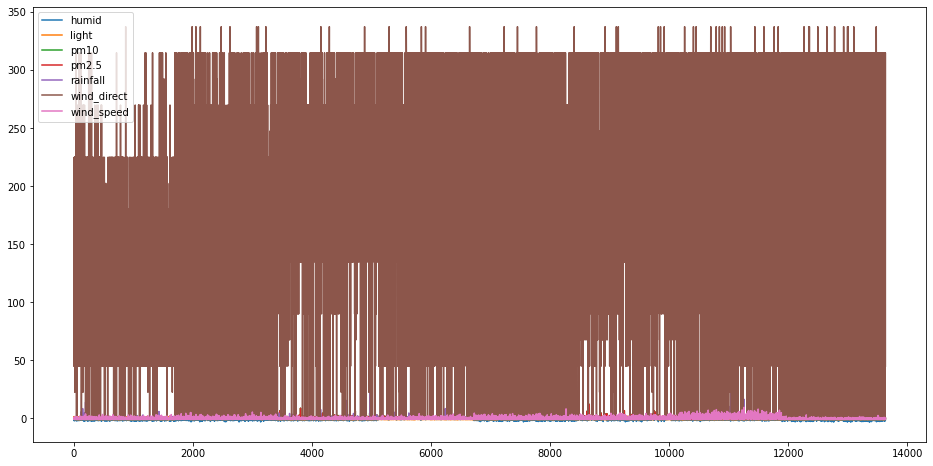

In [ ]:
df_train_nom.iloc[:,11:-1].plot(figsize=(16,8))

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})

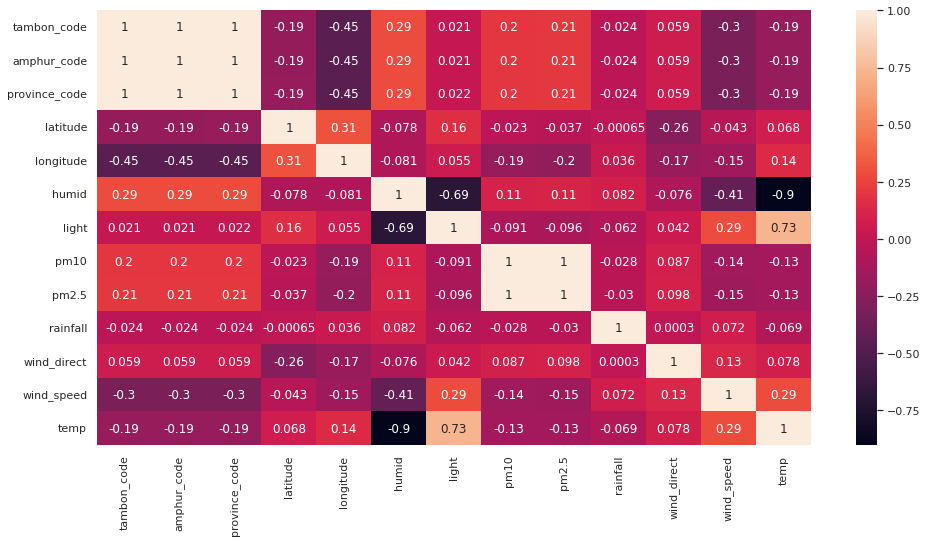

In [ ]:
sns.heatmap(df_train_nom.corr(),annot=True)

In [ ]:
df_train_nom.sample(5)

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
444,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-15 20:00:00+07:00,0.407537,-0.701185,NaN,NaN,-0.122115,180.0,-0.770183,27.5
3722,3C71BF15DB04,บ้านสำโรงเกียรติ_2,330802,บักดอง,3308,ขุนหาญ,33,ศรีสะเกษ,14.533026,104.495172,2022-06-13 13:00:00+07:00,0.680770,-0.672208,0.159000,0.184405,13.990863,225.0,0.516805,25.9
3237,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-07-07 19:00:00+07:00,0.576299,-0.904023,-0.432752,-0.528509,-0.122115,180.0,0.516805,26.7
11385,30AEA4F7AE44,โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),102601,ดินแดง,1026,ดินแดง,10,กรุงเทพมหานคร,13.777972,100.569662,2022-05-14 02:00:00+07:00,-0.283580,-0.961977,-0.314401,-0.409690,-0.122115,225.0,0.252807,30.6
2983,807D3AF57920,บ้านนาสะแบง_2,380704,นาสะแบง,3807,ศรีวิไล,38,บึงกาฬ,18.142499,103.806521,2022-07-08 16:00:00+07:00,0.970075,0.834592,-0.196051,-0.290871,-0.122115,0.0,-0.770183,25.6


## drop column

In [ ]:
df_train_drop = df_train_nom.drop(columns=['mac','tambon_code','tambon_namt','amphur_code','amphur_namt','province_code','province_namt'])

In [ ]:
df_train_drop.head(5)

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,บ้านนา_2,15.112831,102.052114,2022-07-20 15:00:00+07:00,-0.789864,0.747661,NaN,NaN,-0.122115,45.0,0.648803,32.6
1,บ้านนา_2,15.112831,102.052114,2022-05-16 09:00:00+07:00,-1.456873,1.240269,NaN,NaN,-0.122115,45.0,-0.143189,37.9
2,บ้านนา_2,15.112831,102.052114,2022-06-26 19:00:00+07:00,0.793277,-0.961977,NaN,NaN,-0.122115,135.0,0.285807,26.4
3,บ้านนา_2,15.112831,102.052114,2022-07-16 04:00:00+07:00,0.905785,-0.961977,NaN,NaN,-0.122115,157.5,-0.770183,25.6
4,บ้านนา_2,15.112831,102.052114,2022-05-30 08:00:00+07:00,-1.714033,1.095384,NaN,NaN,-0.122115,180.0,-0.011190,36.2


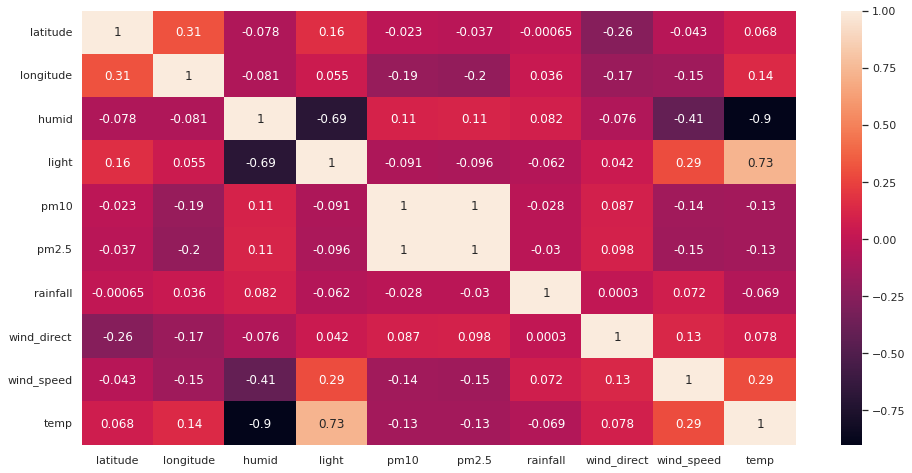

In [ ]:
sns.heatmap(df_train_drop.corr(),annot=True)

In [ ]:
df_train_drop.to_csv('/content/drive/MyDrive/colab_resources/IOT/df_clean_v1.csv',index=False)

## summary of `df_clean_v1.csv`

- delete rows that wind_speed obvious outlier ( > 2000 )
- nomalize by column [ humid, light, pm10, pm2.5, rainfall, wind_speed ] using $Z-score$
- drop column that doesn't have meaning [ mac, tambon_code, tambon_namt, amphur_code, amphur_namt, province_code, province_namt]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab_resources/IOT/df_clean_v1.csv')
df.head(5)

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,บ้านนา_2,15.112831,102.052114,2022-07-20 15:00:00+07:00,-0.789864,0.747661,NaN,NaN,-0.122115,45.0,0.648803,32.6
1,บ้านนา_2,15.112831,102.052114,2022-05-16 09:00:00+07:00,-1.456873,1.240269,NaN,NaN,-0.122115,45.0,-0.143189,37.9
2,บ้านนา_2,15.112831,102.052114,2022-06-26 19:00:00+07:00,0.793277,-0.961977,NaN,NaN,-0.122115,135.0,0.285807,26.4
3,บ้านนา_2,15.112831,102.052114,2022-07-16 04:00:00+07:00,0.905785,-0.961977,NaN,NaN,-0.122115,157.5,-0.770183,25.6
4,บ้านนา_2,15.112831,102.052114,2022-05-30 08:00:00+07:00,-1.714033,1.095384,NaN,NaN,-0.122115,180.0,-0.011190,36.2


In [ ]:
df.shape

(13633, 12)

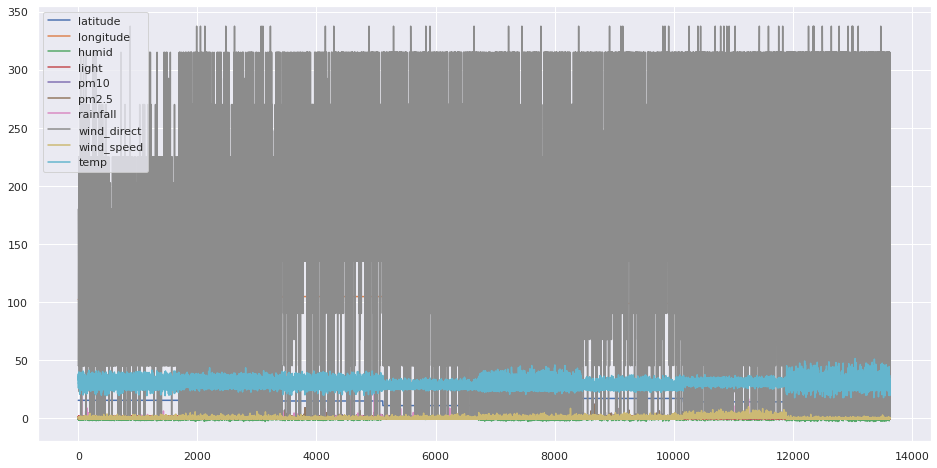

In [ ]:
df.plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13633 entries, 0 to 13632
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  13633 non-null  object 
 1   latitude      13633 non-null  float64
 2   longitude     13633 non-null  float64
 3   time          13633 non-null  object 
 4   humid         13633 non-null  float64
 5   light         13633 non-null  float64
 6   pm10          6839 non-null   float64
 7   pm2.5         6839 non-null   float64
 8   rainfall      13633 non-null  float64
 9   wind_direct   13633 non-null  float64
 10  wind_speed    13633 non-null  float64
 11  temp          13632 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


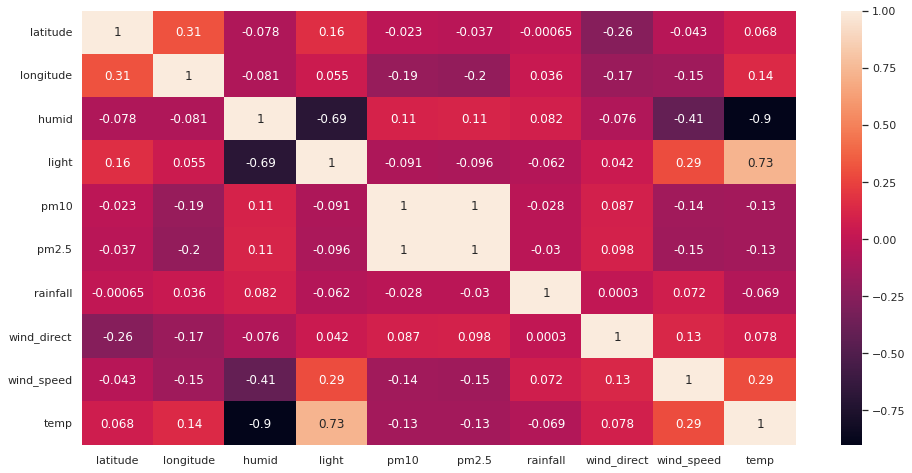

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.sample(10)

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
11619,โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),13.777972,100.569662,2022-06-09 04:00:00+07:00,-0.058565,-0.961977,NaN,NaN,-0.122115,135.0,-0.143189,28.4
12164,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-05-31 12:00:00+07:00,-1.095241,1.414130,NaN,NaN,-0.122115,315.0,-0.473186,37.7
8838,โรงเรียนสรรพวิทยาคม,16.712990,98.573417,2022-07-20 03:00:00+07:00,0.624516,-0.961977,-0.551102,-0.528509,-0.122115,135.0,-0.770183,26.0
11021,โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),13.777972,100.569662,2022-07-29 20:00:00+07:00,-0.516631,-0.961977,NaN,NaN,-0.122115,225.0,1.605795,31.0
6846,โรงเรียนบ้านนา,18.241106,100.690577,2022-05-22 09:00:00+07:00,0.262885,1.095384,NaN,NaN,-0.122115,225.0,2.760784,28.5
3597,บ้านสำโรงเกียรติ_2,14.533026,104.495172,2022-06-26 09:00:00+07:00,-0.243399,1.095384,-0.432752,-0.409690,-0.122115,135.0,-0.077190,32.4
5323,โรงเรียนท่าข้ามวิทยา,10.579849,99.113146,2022-05-23 10:00:00+07:00,1.018292,0.428915,NaN,NaN,-0.122115,0.0,-0.770183,26.0
10636,โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),13.777972,100.569662,2022-07-24 05:00:00+07:00,0.375392,-0.961977,NaN,NaN,-0.122115,157.5,-0.011190,28.1
11735,โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),13.777972,100.569662,2022-07-28 01:00:00+07:00,-0.050529,-0.961977,NaN,NaN,-0.122115,180.0,0.549804,30.0
3446,บ้านสำโรงเกียรติ_2,14.533026,104.495172,2022-07-25 15:00:00+07:00,-0.645211,0.776638,-0.196051,-0.290871,-0.122115,225.0,-0.341187,31.9


# change wind_direct to q1..4

In [ ]:
df.sample(5)

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
5606,โรงเรียนท่าข้ามวิทยา,10.579849,99.113146,2022-06-02 22:00:00+07:00,0.720951,-0.817093,NaN,NaN,-0.122115,225.0,-0.770183,27.2
1180,บ้านนา_2,15.112831,102.052114,2022-07-20 12:00:00+07:00,-1.191676,1.443107,NaN,NaN,-0.122115,45.0,0.945801,35.6
5952,โรงเรียนท่าข้ามวิทยา,10.579849,99.113146,2022-05-20 12:00:00+07:00,0.560226,1.008453,NaN,NaN,-0.122115,225.0,1.473796,27.3
12103,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-07-10 00:00:00+07:00,1.235271,-0.904023,NaN,NaN,-0.122115,315.0,-0.770183,24.9
3312,บ้านนาสะแบง_2,18.142499,103.806521,2022-05-12 04:00:00+07:00,0.552190,-0.875046,-0.432752,-0.40969,-0.122115,0.0,-0.275188,26.4


In [ ]:
len(df.query('wind_direct < 90'))+len(df.query('wind_direct >= 90 & wind_direct < 180'))+len(df.query('wind_direct >= 180 & wind_direct < 270'))+len(df.query('wind_direct >= 270 & wind_direct < 360'))

13633

In [ ]:
((df['wind_direct'] >= 90) & (df['wind_direct'] < 180)).to_numpy().astype(np.int8).reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [ ]:
temp = df.copy()
temp['is_wind_directQ1'] = ((df['wind_direct'] < 90)).to_numpy().astype(np.int8).reshape(-1,1)
temp['is_wind_directQ2'] = ((df['wind_direct'] >= 90) & (df['wind_direct'] < 180)).to_numpy().astype(np.int8).reshape(-1,1)
temp['is_wind_directQ3'] = ((df['wind_direct'] >= 180) & (df['wind_direct'] < 270)).to_numpy().astype(np.int8).reshape(-1,1)
temp['is_wind_directQ4'] = ((df['wind_direct'] >= 270) & (df['wind_direct'] < 360)).to_numpy().astype(np.int8).reshape(-1,1)
temp = temp.drop(columns=['wind_direct'])

In [ ]:
temp.sample(5)

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_speed,temp,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4
1202,บ้านนา_2,15.112831,102.052114,2022-07-09 20:00:00+07:00,0.270921,-0.961977,NaN,NaN,-0.122115,-0.770183,27.9,0,1,0,0
2556,บ้านนาสะแบง_2,18.142499,103.806521,2022-07-12 04:00:00+07:00,0.785241,-0.961977,-0.551102,-0.528509,-0.122115,-0.770183,26.4,1,0,0,0
5107,บ้านสำโรงเกียรติ_2,14.533026,104.495172,2022-07-29 22:00:00+07:00,0.728987,-0.961977,0.277351,0.303224,-0.122115,-0.770183,27.1,0,0,1,0
1559,บ้านนา_2,15.112831,102.052114,2022-07-28 14:00:00+07:00,-1.344365,1.530038,NaN,NaN,-0.122115,1.737793,37.4,0,0,1,0
13095,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-05-18 12:00:00+07:00,-1.440800,1.587992,NaN,NaN,-0.122115,0.582804,33.7,1,0,0,0


In [ ]:
temp_col = temp.pop('temp')

In [ ]:
temp['temp'] = temp_col

In [ ]:
df = temp
df

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,temp
0,บ้านนา_2,15.112831,102.052114,2022-07-20 15:00:00+07:00,-0.789864,0.747661,NaN,NaN,-0.122115,0.648803,1,0,0,0,32.6
1,บ้านนา_2,15.112831,102.052114,2022-05-16 09:00:00+07:00,-1.456873,1.240269,NaN,NaN,-0.122115,-0.143189,1,0,0,0,37.9
2,บ้านนา_2,15.112831,102.052114,2022-06-26 19:00:00+07:00,0.793277,-0.961977,NaN,NaN,-0.122115,0.285807,0,1,0,0,26.4
3,บ้านนา_2,15.112831,102.052114,2022-07-16 04:00:00+07:00,0.905785,-0.961977,NaN,NaN,-0.122115,-0.770183,0,1,0,0,25.6
4,บ้านนา_2,15.112831,102.052114,2022-05-30 08:00:00+07:00,-1.714033,1.095384,NaN,NaN,-0.122115,-0.011190,0,0,1,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-06-14 01:00:00+07:00,1.404032,-0.961977,NaN,NaN,3.653331,-0.770183,1,0,0,0,23.5
13629,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-05-03 02:00:00+07:00,0.013761,-0.961977,NaN,NaN,-0.122115,0.186808,0,1,0,0,19.3
13630,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-05-19 06:00:00+07:00,0.600407,0.110169,NaN,NaN,-0.122115,0.219808,1,0,0,0,24.5
13631,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-06-15 02:00:00+07:00,0.761132,-0.961977,NaN,NaN,-0.122115,-0.770183,0,0,0,1,27.3


#extract datetime to feature

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13633 entries, 0 to 13632
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   station_name      13633 non-null  object                               
 1   latitude          13633 non-null  float64                              
 2   longitude         13633 non-null  float64                              
 3   time              13633 non-null  datetime64[ns, pytz.FixedOffset(420)]
 4   humid             13633 non-null  float64                              
 5   light             13633 non-null  float64                              
 6   pm10              6839 non-null   float64                              
 7   pm2.5             6839 non-null   float64                              
 8   rainfall          13633 non-null  float64                              
 9   wind_speed        13633 non-null  float

In [ ]:
df['is_morning'] = ((df['time'].map(lambda x : x.hour) >= 6) & (df['time'].map(lambda x : x.hour) < 11)).astype(np.int8)
df['is_noon'] = ((df['time'].map(lambda x : x.hour) >= 11) & (df['time'].map(lambda x : x.hour) < 14)).astype(np.int8)
df['is_afternoon'] = ((df['time'].map(lambda x : x.hour) >= 14) & (df['time'].map(lambda x : x.hour) < 19)).astype(np.int8)
df['is_night'] = ((df['time'].map(lambda x : x.hour) >= 19) | (df['time'].map(lambda x : x.hour) < 6)).astype(np.int8)


In [ ]:
df

,station_name,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,temp,is_morning,is_noon,is_afternoon,is_night
0,บ้านนา_2,15.112831,102.052114,2022-07-20 15:00:00+07:00,-0.789864,0.747661,NaN,NaN,-0.122115,0.648803,1,0,0,0,32.6,0,0,1,0
1,บ้านนา_2,15.112831,102.052114,2022-05-16 09:00:00+07:00,-1.456873,1.240269,NaN,NaN,-0.122115,-0.143189,1,0,0,0,37.9,1,0,0,0
2,บ้านนา_2,15.112831,102.052114,2022-06-26 19:00:00+07:00,0.793277,-0.961977,NaN,NaN,-0.122115,0.285807,0,1,0,0,26.4,0,0,0,1
3,บ้านนา_2,15.112831,102.052114,2022-07-16 04:00:00+07:00,0.905785,-0.961977,NaN,NaN,-0.122115,-0.770183,0,1,0,0,25.6,0,0,0,1
4,บ้านนา_2,15.112831,102.052114,2022-05-30 08:00:00+07:00,-1.714033,1.095384,NaN,NaN,-0.122115,-0.011190,0,0,1,0,36.2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-06-14 01:00:00+07:00,1.404032,-0.961977,NaN,NaN,3.653331,-0.770183,1,0,0,0,23.5,0,0,0,1
13629,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-05-03 02:00:00+07:00,0.013761,-0.961977,NaN,NaN,-0.122115,0.186808,0,1,0,0,19.3,0,0,0,1
13630,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-05-19 06:00:00+07:00,0.600407,0.110169,NaN,NaN,-0.122115,0.219808,1,0,0,0,24.5,1,0,0,0
13631,โรงเรียนหนองสูงสามัคคีวิทยา_2,16.494229,104.350891,2022-06-15 02:00:00+07:00,0.761132,-0.961977,NaN,NaN,-0.122115,-0.770183,0,0,0,1,27.3,0,0,0,1


In [ ]:
np.sum(np.sum(df.iloc[:,15:]).to_list())

13633

In [ ]:
df = df.drop(columns=['time'])

In [ ]:
temp = df.pop('temp')
df['temp'] = temp

In [ ]:
df.sample(5)

,station_name,latitude,longitude,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,is_afternoon,is_night,temp
10164,โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),13.777972,100.569662,-0.998806,0.718684,NaN,NaN,-0.122115,1.836792,0,1,0,0,0,1,0,0,31.6
2040,บ้านนาสะแบง_2,18.142499,103.806521,-0.074638,-0.961977,-0.669453,-0.647328,-0.122115,-0.704184,1,0,0,0,0,0,0,1,30.3
1670,บ้านนา_2,15.112831,102.052114,0.737024,-0.701185,NaN,NaN,-0.122115,-0.308188,0,1,0,0,0,0,0,1,25.5
1170,บ้านนา_2,15.112831,102.052114,-1.898866,1.559015,NaN,NaN,-0.122115,0.582804,0,0,1,0,0,1,0,0,37.4
8942,โรงเรียนสรรพวิทยาคม,16.712990,98.573417,0.423610,-0.961977,0.869103,0.897319,-0.122115,-0.770183,0,0,1,0,0,0,0,1,26.9


# drop lat,long and extract station_name to category

In [ ]:
df.head(5)

,station_name,latitude,longitude,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,is_afternoon,is_night,temp
0,บ้านนา_2,15.112831,102.052114,-0.789864,0.747661,NaN,NaN,-0.122115,0.648803,1,0,0,0,0,0,1,0,32.6
1,บ้านนา_2,15.112831,102.052114,-1.456873,1.240269,NaN,NaN,-0.122115,-0.143189,1,0,0,0,1,0,0,0,37.9
2,บ้านนา_2,15.112831,102.052114,0.793277,-0.961977,NaN,NaN,-0.122115,0.285807,0,1,0,0,0,0,0,1,26.4
3,บ้านนา_2,15.112831,102.052114,0.905785,-0.961977,NaN,NaN,-0.122115,-0.770183,0,1,0,0,0,0,0,1,25.6
4,บ้านนา_2,15.112831,102.052114,-1.714033,1.095384,NaN,NaN,-0.122115,-0.011190,0,0,1,0,1,0,0,0,36.2


In [ ]:
df = df.drop(columns=['latitude','longitude'])

In [ ]:
df.sample(5)

,station_name,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,is_afternoon,is_night,temp
5843,โรงเรียนท่าข้ามวิทยา,0.720951,-0.527323,NaN,NaN,-0.122115,-0.341187,0,0,0,1,0,0,0,1,26.8
3811,บ้านสำโรงเกียรติ_2,-0.355906,-0.933000,-0.551102,-0.528509,-0.122115,-0.407187,0,0,1,0,0,0,0,1,26.8
5467,โรงเรียนท่าข้ามวิทยา,0.921857,-0.961977,NaN,NaN,-0.122115,-0.374187,1,0,0,0,0,0,0,1,26.4
5887,โรงเรียนท่าข้ามวิทยา,0.608444,-0.556300,NaN,NaN,-0.122115,-0.770183,0,0,0,1,0,0,0,1,26.5
9440,โรงเรียนสรรพวิทยาคม,0.584335,-0.961977,-0.551102,-0.409690,-0.122115,0.318807,0,0,1,0,0,0,0,1,24.6


In [ ]:
for cat in df.station_name.unique():
    df['is_'+cat] = (df['station_name'] == cat).astype(np.int8)

In [ ]:
temp = df.pop('temp')
df['temp'] = temp

In [ ]:
df = df.drop(columns=['station_name'])

In [ ]:
df.sample(10)

,humid,light,pm10,pm2.5,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,...,is_night,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,temp
9632,-0.371979,-0.759139,0.632402,0.659681,-0.122115,-0.770183,0,0,0,1,...,0,0,0,0,0,0,1,0,0,24.3
7258,0.206631,0.776638,NaN,NaN,-0.122115,-0.473186,0,0,0,1,...,0,0,0,0,0,1,0,0,0,28.3
9313,0.954002,0.341984,0.632402,0.659681,-0.122115,-0.770183,0,1,0,0,...,0,0,0,0,0,0,1,0,0,25.3
7898,0.520045,0.486869,NaN,NaN,-0.122115,-0.275188,0,0,1,0,...,0,0,0,0,0,1,0,0,0,28.8
1143,0.576299,-0.382439,NaN,NaN,-0.122115,-0.770183,0,1,0,0,...,0,1,0,0,0,0,0,0,0,25.9
8792,0.214667,1.095384,-0.669453,-0.647328,-0.122115,2.331788,0,1,0,0,...,0,0,0,0,0,0,1,0,0,26.6
4125,-1.038988,1.327199,-0.196051,-0.053233,-0.122115,0.648803,0,1,0,0,...,0,0,0,1,0,0,0,0,0,34.4
633,1.042401,-0.788116,NaN,NaN,-0.122115,-0.770183,1,0,0,0,...,1,1,0,0,0,0,0,0,0,26.2
8433,0.391465,-0.961977,NaN,NaN,-0.122115,1.407796,0,0,1,0,...,1,0,0,0,0,1,0,0,0,25.4
11636,-0.958625,-0.961977,NaN,NaN,-0.122115,1.077799,0,0,1,0,...,1,0,0,0,0,0,0,1,0,30.3


In [ ]:
df = df.drop(columns=['pm10','pm2.5'])

In [ ]:
df.to_csv('/content/drive/MyDrive/colab_resources/IOT/df_clean_v2.csv',index=False)
df.head(5)

,humid,light,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,...,is_night,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,temp
0,-0.789864,0.747661,-0.122115,0.648803,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,32.6
1,-1.456873,1.240269,-0.122115,-0.143189,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,37.9
2,0.793277,-0.961977,-0.122115,0.285807,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,26.4
3,0.905785,-0.961977,-0.122115,-0.770183,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,25.6
4,-1.714033,1.095384,-0.122115,-0.011190,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,36.2


In [ ]:
!ls /content/drive/MyDrive/colab_resources/IOT/

df_clean_v1.csv  IOT_Submit.csv  IOT_Train.csv
df_clean_v2.csv  IOT_Test.csv	 submission.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab_resources/IOT/df_clean_v2.csv')
df.sample(10)

,humid,light,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,...,is_night,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,temp
8461,0.560226,-0.788116,-0.122115,-0.308188,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,25.8
4804,1.291525,0.834592,-0.122115,-0.275188,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,27.0
3777,1.307597,-0.701185,-0.122115,-0.770183,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,24.1
9830,0.857567,-0.961977,-0.122115,-0.770183,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,26.1
6233,0.102160,-0.961977,-0.122115,-0.143189,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,27.5
5806,-0.596994,0.486869,-0.122115,0.021809,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,31.8
6499,0.833459,-0.961977,-0.122115,-0.770183,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,25.7
3597,-0.243399,1.095384,-0.122115,-0.077190,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,32.4
7432,1.516540,-0.961977,-0.122115,-0.770183,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,24.2
10112,0.278957,-0.150623,-0.122115,0.318807,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,26.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13633 entries, 0 to 13632
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   humid                                    13633 non-null  float64
 1   light                                    13633 non-null  float64
 2   rainfall                                 13633 non-null  float64
 3   wind_speed                               13633 non-null  float64
 4   is_wind_directQ1                         13633 non-null  int64  
 5   is_wind_directQ2                         13633 non-null  int64  
 6   is_wind_directQ3                         13633 non-null  int64  
 7   is_wind_directQ4                         13633 non-null  int64  
 8   is_morning                               13633 non-null  int64  
 9   is_noon                                  13633 non-null  int64  
 10  is_afternoon                             13633

In [ ]:
np.mean(df['temp'].to_numpy())

29.08164013790068

In [ ]:
df.loc[df['temp'].isnull(),'temp'] = np.mean(df['temp'].to_numpy())

In [ ]:
df['temp'].isnull().any()

False

# modeling

In [ ]:
X,y = df.iloc[:,:-1].to_numpy().astype(np.float32),df.iloc[:,-1].to_numpy().astype(np.float32)
X.shape,y.shape

((13633, 20), (13633,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape,y_train.shape

((10906, 20), (10906,))

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu',input_shape=(20,)))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)

model.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                metrics = ['mae'])

In [ ]:
history = model.fit(X_train,y_train,epochs=6000,batch_size=200,validation_data=(X_test,y_test))

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
55/55 [==============================] - 0s 5ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9263 - val_mae: 0.9263
Epoch 3502/6000
55/55 [==============================] - 0s 5ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9263 - val_mae: 0.9263
Epoch 3503/6000
55/55 [==============================] - 0s 6ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9263 - val_mae: 0.9263
Epoch 3504/6000
55/55 [==============================] - 0s 5ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9263 - val_mae: 0.9263
Epoch 3505/6000
55/55 [==============================] - 0s 5ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9263 - val_mae: 0.9263
Epoch 3506/6000
55/55 [==============================] - 0s 6ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9262 - val_mae: 0.9262
Epoch 3507/6000
55/55 [==============================] - 0s 5ms/step - loss: 0.9550 - mae: 0.9550 - val_loss: 0.9262 - val_mae: 0.9262
Epoch 3508/600

In [ ]:
import matplotlib.pyplot as plt

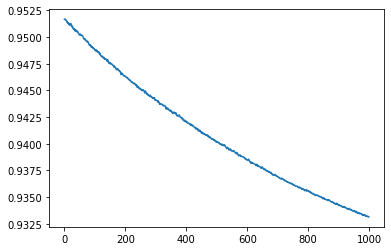

In [ ]:
plt.plot(history.history['val_mae'])

# submission

In [ ]:
test = pd.read_csv('/content/IOT_Test.csv')

In [ ]:
test.columns

Index(['id', 'mac', 'station_name', 'tambon_code', 'tambon_namt',
       'amphur_code', 'amphur_namt', 'province_code', 'province_namt',
       'latitude', 'longitude', 'time', 'humid', 'light', 'pm10', 'pm2.5',
       'rainfall', 'wind_direct', 'wind_speed'],
      dtype='object')

In [ ]:
test = test.drop(columns=['id', 'mac', 'tambon_code', 'tambon_namt',
       'amphur_code', 'amphur_namt', 'province_code', 'province_namt',
       'latitude', 'longitude'])

KeyError: ignored

In [ ]:
df.head()

,humid,light,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,...,is_night,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2,temp
0,-0.789864,0.747661,-0.122115,0.648803,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,32.6
1,-1.456873,1.240269,-0.122115,-0.143189,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,37.9
2,0.793277,-0.961977,-0.122115,0.285807,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,26.4
3,0.905785,-0.961977,-0.122115,-0.770183,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,25.6
4,-1.714033,1.095384,-0.122115,-0.011190,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,36.2


In [ ]:
test

In [ ]:
test_temp = test.copy()
for column in test_temp.columns[2:]:
    if column != 'wind_direct':
        test_temp[column] = (test_temp[column] - test_temp[column].mean()) / test_temp[column].std()

In [ ]:
test_temp

In [ ]:
test = test_temp.drop(columns=['pm10','pm2.5'])
test

In [ ]:
temp = test.copy()
temp['is_wind_directQ1'] = ((test['wind_direct'] < 90)).to_numpy().astype(np.int8).reshape(-1,1)
temp['is_wind_directQ2'] = ((test['wind_direct'] >= 90) & (test['wind_direct'] < 180)).to_numpy().astype(np.int8).reshape(-1,1)
temp['is_wind_directQ3'] = ((test['wind_direct'] >= 180) & (test['wind_direct'] < 270)).to_numpy().astype(np.int8).reshape(-1,1)
temp['is_wind_directQ4'] = ((test['wind_direct'] >= 270) & (test['wind_direct'] < 360)).to_numpy().astype(np.int8).reshape(-1,1)
temp = temp.drop(columns=['wind_direct'])
test = temp
test

In [ ]:
test['time'] = pd.to_datetime(test['time'])

In [ ]:
test['is_morning'] = ((test['time'].map(lambda x : x.hour) >= 6) & (test['time'].map(lambda x : x.hour) < 11)).astype(np.int8)
test['is_noon'] = ((test['time'].map(lambda x : x.hour) >= 11) & (test['time'].map(lambda x : x.hour) < 14)).astype(np.int8)
test['is_afternoon'] = ((test['time'].map(lambda x : x.hour) >= 14) & (test['time'].map(lambda x : x.hour) < 19)).astype(np.int8)
test['is_night'] = ((test['time'].map(lambda x : x.hour) >= 19) | (test['time'].map(lambda x : x.hour) < 6)).astype(np.int8)
test

In [ ]:
test = test.drop(columns=['time'])
test

In [ ]:
for cat in test.station_name.unique():
    test['is_'+cat] = (test['station_name'] == cat).astype(np.int8)

In [ ]:
test.pop('station_name')

0                            บ้านนา_2
1                            บ้านนา_2
2                            บ้านนา_2
3                            บ้านนา_2
4                            บ้านนา_2
                    ...              
3408    โรงเรียนหนองสูงสามัคคีวิทยา_2
3409    โรงเรียนหนองสูงสามัคคีวิทยา_2
3410    โรงเรียนหนองสูงสามัคคีวิทยา_2
3411    โรงเรียนหนองสูงสามัคคีวิทยา_2
3412    โรงเรียนหนองสูงสามัคคีวิทยา_2
Name: station_name, Length: 3413, dtype: object

In [ ]:
test

,humid,light,rainfall,wind_speed,is_wind_directQ1,is_wind_directQ2,is_wind_directQ3,is_wind_directQ4,is_morning,is_noon,is_afternoon,is_night,is_บ้านนา_2,is_บ้านนาสะแบง_2,is_บ้านสำโรงเกียรติ_2,is_โรงเรียนท่าข้ามวิทยา,is_โรงเรียนบ้านนา,is_โรงเรียนสรรพวิทยาคม,is_โรงเรียนสามเสนนอก(ประชาราษฎร์อนุกูล),is_โรงเรียนหนองสูงสามัคคีวิทยา_2
0,0.673281,-0.928935,-0.137931,-0.017455,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0.364035,0.200454,0.156907,-0.020299,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,0.673281,-0.755183,-0.137931,-0.025630,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0.118223,0.953380,-0.137931,-0.024919,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,-1.229775,1.098173,-0.137931,-0.017100,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,0.522623,-0.957894,-0.137931,-0.025630,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3409,-0.690576,1.387760,-0.137931,-0.014612,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3410,0.482976,-0.899976,-0.137931,-0.023497,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3411,1.275916,-0.957894,-0.137931,-0.025630,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
test_np = test.to_numpy()

In [ ]:
pred = model.predict(test_np)

107/107 [==============================] - 0s 1ms/step


In [ ]:
!cp /content/IOT_Submit.csv /content/submission.csv

In [ ]:
submit = pd.read_csv('/content/submission.csv')

In [ ]:
submit['temp'] = pred

In [ ]:
submit.to_csv('/content/submission.csv',index=False)

In [ ]:
submit = pd.read_csv('/content/submission.csv')
submit

,id,temp
0,1,25.880829
1,2,27.820606
2,3,25.806122
3,4,29.180813
4,5,34.197020
...,...,...
3408,3409,26.647547
3409,3410,33.406136
3410,3411,26.964687
3411,3412,24.871212


In [ ]:
!kaggle competitions submit -c ss3-hackathon-online-iots-and-robotics -f /content/submission.csv -m "after 6000 epochs"

100% 48.1k/48.1k [00:01<00:00, 27.4kB/s]
Successfully submitted to Hackathon Online: IoTs and Robotics